## Observations and Insights

In [1]:
# The regimens that had the smallest average tumor volume also had lowest standard error of the mean values.

In [2]:
# There were generally the same number of male and female mice being tested.

In [3]:
# There is a strong correlation between mouse weight and tumor volume for mice in the Capomulin regimen.

## Dependencies and starter code

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
mouse_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Review data to make sure all data complete
mouse_df["Mouse ID"].unique()
mouse_df["Drug Regimen"].unique()
mouse_df["Sex"].unique()
mouse_df["Age_months"].unique()
mouse_df["Weight (g)"].unique()
mouse_df["Timepoint"].unique()
mouse_df["Tumor Volume (mm3)"].unique()
mouse_df["Metastatic Sites"].unique()

array([0, 1, 2, 3, 4], dtype=int64)

## Summary statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = mouse_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar plots

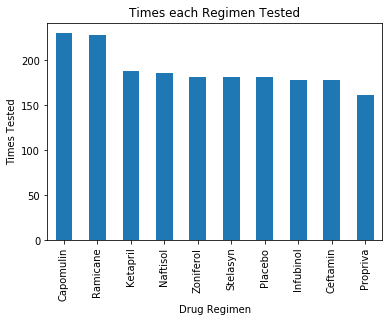

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
pandas_bar = mouse_df["Drug Regimen"].value_counts().plot(kind= 'bar')

#setting the lables and title
pandas_bar.set_xlabel("Drug Regimen")
pandas_bar.set_ylabel("Times Tested")
pandas_bar.set_title("Times each Regimen Tested")

plt.show()

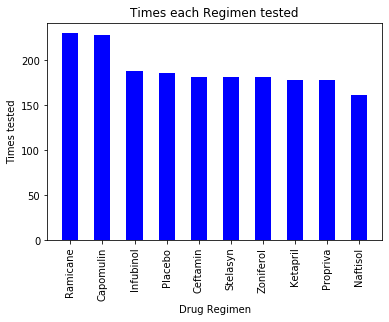

In [8]:

#setting the axis values
x_axis = mouse_df["Drug Regimen"].unique()
y_axis = mouse_df["Drug Regimen"].value_counts()

#setting the lables and title
plt.title("Times each Regimen tested")
plt.xlabel("Drug Regimen")
plt.ylabel("Times tested")

#Setting the tickmark direction
plt.xticks(rotation="90")

# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(x_axis,y_axis, color = 'b', width = 0.5)
plt.show()

## Pie plots

Text(0.5, 1.0, 'Male vs Female Mice Tested')

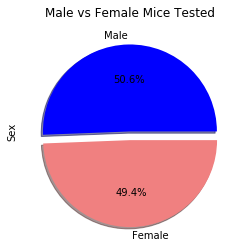

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pandas_pie = mouse_df["Sex"].value_counts().plot(kind= 'pie', colors=["blue", "lightcoral"], 
                                                 autopct="%1.1f%%", 
                                                 shadow=True, 
                                                 explode= [0,0.1])
pandas_pie.set_title("Male vs Female Mice Tested")

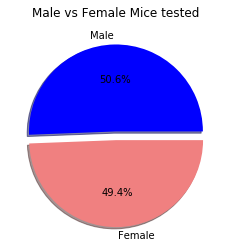

In [10]:
#setting a variable to use in the pie chart
sex = mouse_df["Sex"].value_counts()

#setting the lables and title
label = mouse_df["Sex"].unique()
plt.title("Male vs Female Mice tested")

# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex, labels= label, colors=["blue","lightcoral"], autopct="%1.1f%%", shadow=True, explode= [0,0.1])
plt.show()

## Quartiles, outliers and boxplots

In [11]:
#find 4 most promising
most_promise = pd.DataFrame(summary_stats['Tumor Volume (mm3)']['sem'].nsmallest(4)).reset_index()
most_promise


,Drug Regimen,sem
0,Ramicane,0.320955
1,Capomulin,0.329346
2,Ceftamin,0.469821
3,Infubinol,0.492236


In [12]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
top4_vol_df = mouse_df.loc[mouse_df["Drug Regimen"].isin(most_promise["Drug Regimen"]),["Drug Regimen","Mouse ID","Timepoint","Tumor Volume (mm3)"]]
top_fin_df = top4_vol_df.sort_values("Timepoint", ascending = False).drop_duplicates(["Mouse ID"])
top_fin_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
1872,Infubinol,z581,45,62.754451
800,Infubinol,e476,45,62.435404
154,Ramicane,c758,45,33.397653
440,Capomulin,i557,45,47.685963
144,Capomulin,m957,45,33.329098
...,...,...,...,...
1205,Infubinol,m756,5,47.010364
1743,Ceftamin,x226,0,45.000000
594,Ceftamin,b447,0,45.000000
1551,Ceftamin,t573,0,45.000000


In [13]:

ramicane = top_fin_df.loc[top_fin_df["Drug Regimen"]== "Ramicane"]
capomulin = top_fin_df.loc[top_fin_df["Drug Regimen"]== "Capomulin"]
ceftamin = top_fin_df.loc[top_fin_df["Drug Regimen"]== "Ceftamin"]
infubinol = top_fin_df.loc[top_fin_df["Drug Regimen"]== "Infubinol"]

top4_list= [ramicane, capomulin, ceftamin, infubinol]


In [14]:
#Calculate the IQR and quantitatively determine if there are any potential outliers.
for x in top4_list:
    quartiles1 = x["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq1 = quartiles1[0.25]
    upperq1 = quartiles1[0.75]
    iqr1 = upperq1-lowerq1
    lower_bound1 = lowerq1 - (1.5*iqr1)
    upper_bound1 = upperq1 + (1.5*iqr1)
    outlier_low1 = x[x["Tumor Volume (mm3)"]<lower_bound1]["Tumor Volume (mm3)"].count()
    outlier_high1 = x[x["Tumor Volume (mm3)"]>upper_bound1]["Tumor Volume (mm3)"].count()
    drug = x["Drug Regimen"].iloc[0]

    print(f"""
            {drug} Tumor Volume:
                  Lower quartile: {lowerq1}
                  Upper quartile: {upperq1}
                  Interquartile range: {iqr1}
                  Median: {quartiles1[0.5]}
                  There are {outlier_low1} values below {lower_bound1} that could be outliers.
                  Ther are {outlier_high1} values above {upper_bound1} that could be outliers.""")




            Ramicane Tumor Volume:
                  Lower quartile: 31.56046955
                  Upper quartile: 40.65900627
                  Interquartile range: 9.098536719999998
                  Median: 36.56165229
                  There are 0 values below 17.912664470000003 that could be outliers.
                  Ther are 0 values above 54.30681135 that could be outliers.

            Capomulin Tumor Volume:
                  Lower quartile: 32.37735684
                  Upper quartile: 40.1592203
                  Interquartile range: 7.781863460000004
                  Median: 38.125164399999996
                  There are 0 values below 20.70456164999999 that could be outliers.
                  Ther are 0 values above 51.83201549 that could be outliers.

            Ceftamin Tumor Volume:
                  Lower quartile: 48.72207785
                  Upper quartile: 64.29983003
                  Interquartile range: 15.577752179999997
                  Median: 59.85195

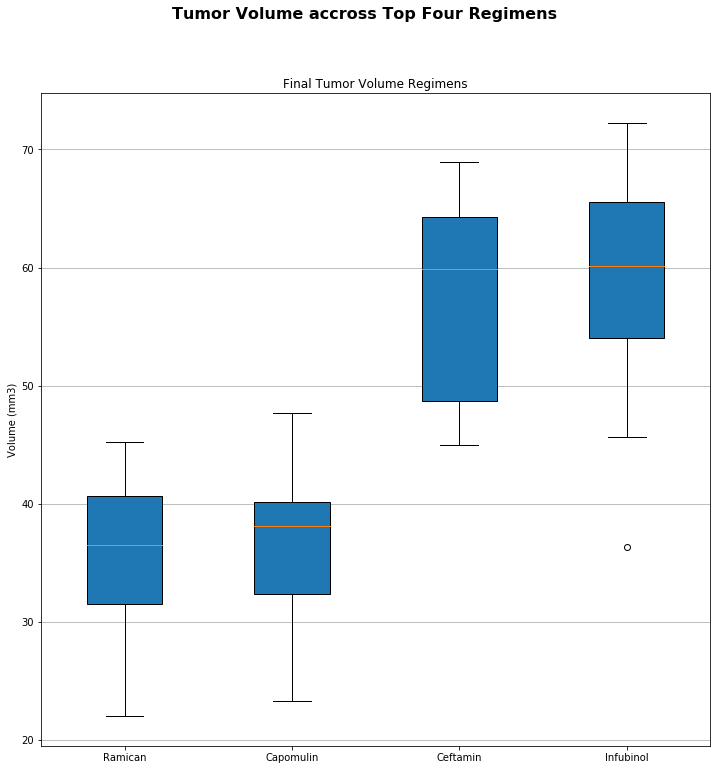

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots(1, sharex=True, figsize= (12,12))
fig.suptitle("Tumor Volume accross Top Four Regimens", fontsize=16, fontweight="bold")

data_box = [ramicane["Tumor Volume (mm3)"], capomulin["Tumor Volume (mm3)"], ceftamin["Tumor Volume (mm3)"], infubinol["Tumor Volume (mm3)"]]
ax.set_title('Final Tumor Volume Regimens')
ax.set_ylabel('Volume (mm3)')
ax.yaxis.grid(True)
ax.boxplot(data_box, labels = ["Ramican", "Capomulin","Ceftamin", "Infubinol"], patch_artist=True)
plt.show()

In [18]:
mice = mouse_df.loc[mouse_df["Drug Regimen"] =="Capomulin"].sort_values("Timepoint", ascending = False)
mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
134,r554,Capomulin,Female,8,17,45,32.377357,3
224,w914,Capomulin,Male,24,21,45,36.041047,2
360,g316,Capomulin,Female,22,22,45,40.159220,2
39,m601,Capomulin,Male,22,17,45,28.430964,1
104,u364,Capomulin,Male,18,17,45,31.023923,3
...,...,...,...,...,...,...,...,...
338,w150,Capomulin,Male,23,23,0,45.000000,0
341,v923,Capomulin,Female,19,21,0,45.000000,0
351,g316,Capomulin,Female,22,22,0,45.000000,0
361,s710,Capomulin,Female,1,23,0,45.000000,0


## Line and scatter plots

Text(0, 0.5, 'Tumor Volume (mm3)')

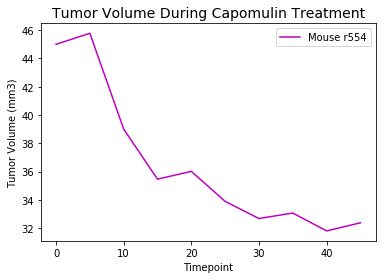

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_volume = mouse_df.loc[mouse_df["Mouse ID"] == "r554"]
plt.plot(mouse_volume["Timepoint"], mouse_volume["Tumor Volume (mm3)"], color="m", label = "Mouse r554")
plt.legend(loc="best")
plt.title("Tumor Volume During Capomulin Treatment", fontsize = 14)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

Text(0.5, 1.0, 'Weight vs Tumor Volume for Capomulin')

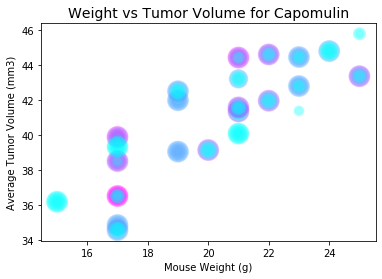

In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mice_mean = pd.DataFrame(mice.groupby("Mouse ID")["Tumor Volume (mm3)"].mean())
mouse_weights_df = pd.merge(mice, mice_mean, on="Mouse ID", how="outer")

plt.scatter(mouse_weights_df["Weight (g)"], mouse_weights_df["Tumor Volume (mm3)_y"], cmap=plt.cm.cool, c = mouse_weights_df["Metastatic Sites"]*100, s = mouse_weights_df["Timepoint"]*10, alpha = 0.2)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin", fontsize = 14)

The correlation between both factors is 0.83


Text(0.5, 1.0, 'Weight vs Tumor Volume for Capomulin')

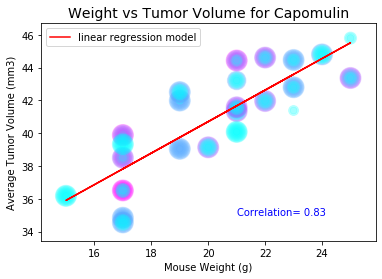

In [26]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = stats.pearsonr(mouse_weights_df["Weight (g)"],  mouse_weights_df["Tumor Volume (mm3)_y"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(mouse_weights_df["Weight (g)"],  mouse_weights_df["Tumor Volume (mm3)_y"])
vc_fit = vc_slope * mouse_weights_df["Weight (g)"] + vc_int
plt.plot(mouse_weights_df["Weight (g)"], vc_fit, c="r", label="linear regression model")
plt.legend()
plt.annotate(f"Correlation= {round(correlation[0],2)}",(21,35),fontsize=10,color="blue")

plt.scatter(mouse_weights_df["Weight (g)"], mouse_weights_df["Tumor Volume (mm3)_y"], cmap=plt.cm.cool, c = mouse_weights_df["Metastatic Sites"]*100, s = mouse_weights_df["Timepoint"]*10, alpha = 0.2)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin", fontsize = 14)